<a href="https://colab.research.google.com/github/alvinadar/ANN-Saturday-8Pm/blob/main/Lesson_64_3_ANN_Basic_Regression_(Predicting_House_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

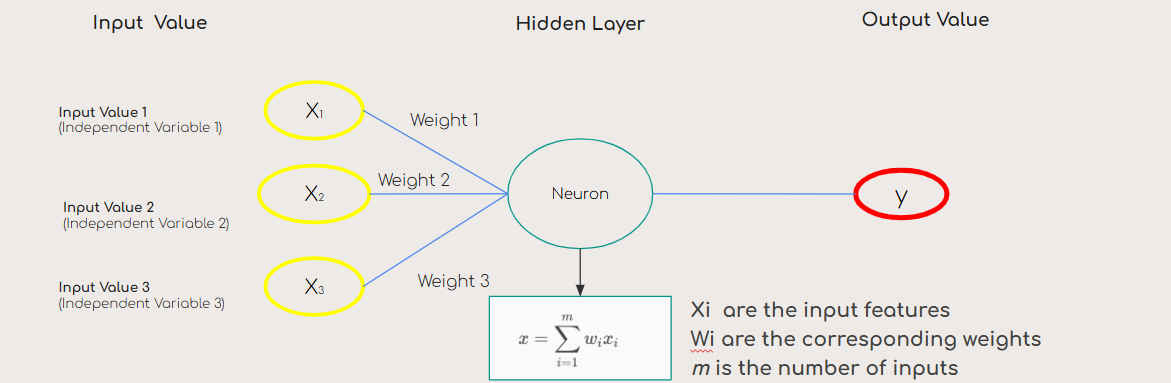

#Import library

In [1]:
import tensorflow as tf #Import the core tensorflow library
from tensorflow import keras #Import the Keras API, whihx is now the official high-level API for building and training deep learning models in Tensorflow
from tensorflow.keras import layers
import numpy as np

#Genarate a syntetic data for the house price

In [2]:
np.random.seed(42) # for reproducibility

num_samples = 1000
house_sizes = np.random.uniform(800, 3000, num_samples) # 800 to 3000 sqft
num_bedrooms = np.random.randint(1, 6, num_samples)     # 1 to 5 bedrooms
location_scores = np.random.uniform(0.1, 1.0, num_samples) # 0.1 to 1.0 (higher is better)

# Simple linear relationship with some noise for house prices
# Price = (size * 0.1) + (bedrooms * 20) + (location_score * 50) + bias + noise
true_prices = (house_sizes * 0.1) + (num_bedrooms * 20) + (location_scores * 50) + 50 + np.random.normal(0, 30, num_samples)
true_prices = true_prices / 1000 # Convert to thousands USD for easier scaling

# Combine features into an input matrix X
X = np.column_stack((house_sizes, num_bedrooms, location_scores))
y = true_prices.reshape(-1, 1) # Reshape y to be a column vector

# Normalize features (Min-Max Scaling)

In [3]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)

X_scaled = (X-X_min)/(X_max-X_min)

# Normalize target (Min-Max Scaling)

In [4]:
y_min = y.min(axis=0)
y_max = y.max(axis=0)
y_scaled = (y-y_min)/(y_max-y_min)

#Create the neural network

In [6]:
input_dim = X.shape[1]

print(input_dim)#Retuns 3 as the number of features

3


#Define the model

In [8]:
model = keras.Sequential([
    #Create the input and the hidden layer
    layers.Dense(units = input_dim,activation = "relu",input_shape = [input_dim]),
    layers.Dense(units=1)#If you are predicting a continous value , you dont need activaiton function
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Train the model

In [9]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['MSE'])#The lower the MSE the more accurate the model is

#Optimizer is used to update the weight of the neural network

In [11]:
#Train the ANN

model.fit(X_scaled,y_scaled,batch_size = 32,epochs = 100)#The lower the MSE the more accurate the model is
#batch_size = 32 means the model will updat its weights after processing batches of 32 samples form the data
#epoch = 100 -> Means the model will iterate throught the entire dataset 100 times during training .

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MSE: 1.1831 - loss: 1.1831
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.9113 - loss: 0.9113
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.6804 - loss: 0.6804
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.5163 - loss: 0.5163
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.3971 - loss: 0.3971
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.2654 - loss: 0.2654
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.2138 - loss: 0.2138  
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.1525 - loss: 0.1525 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.1262 - loss: 0.1262 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.1053 - loss: 0.1053 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.0946 - loss: 0.0946 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.0874 - loss: 0.0874 
Epoch 13/100
32/32 ━━━━━━━━━━━

#Predict the house price using a new data

In [12]:
new_data = np.array([[2500,4,0.8]])

#Normalize the new data using min/max from the training data

new_data_scaled = (new_data - X_min)/(X_max - X_min)

#Make the predictions
predicted_scaled_price = model.predict(new_data_scaled)

#Inverse the scale the predictions to get the actual price
predicted_price = predicted_scaled_price*(y_max-y_min)+y_min

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [13]:
print("Predicted house price (in thousands USD)")
print(predicted_price*1000)

Predicted house price (in thousands USD)
[[412.74205255]]
